# Twists and exponential coordinates

In [4]:
#setup the notebook for matplotlib
%matplotlib notebook

#all the libraries we will need
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import sin,cos,pi,exp,sqrt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets
from IPython.display import display, Latex, Markdown

#this is the library that contains all the rigid body tranforms functions
import transforms


from display_helpers import pmatrix, bmatrix


from scipy.linalg import expm, logm
np.set_printoptions(suppress=True, precision=5)


In [5]:
def transform_cube(vertices, T):
    v_new = vertices.copy()

    for i in range(len(vertices)):
        v_aug = np.ones([4,1])
        v_aug[0:3,0] = vertices[i,:].transpose()
        v_aug_new = T.dot(v_aug)
        v_new[i,:] = v_aug_new[0:3,0]
    return v_new

def update_plot(ax, original_vert, vertices, T, axis=None):
    # generate list of sides' polygons of our pyramid
    sides = [ [vertices[0],vertices[1],vertices[2],vertices[3]],
              [vertices[0],vertices[1],vertices[5],vertices[4]],
              [vertices[2],vertices[3],vertices[7],vertices[6]],
              [vertices[7],vertices[6],vertices[5],vertices[4]],
           [vertices[0],vertices[3],vertices[7],vertices[4]],
           [vertices[1],vertices[2],vertices[6],vertices[5]]]
    orig_sides = [ [original_vert[0],original_vert[1],original_vert[2],original_vert[3]],
              [original_vert[0],original_vert[1],original_vert[5],original_vert[4]],
              [original_vert[2],original_vert[3],original_vert[7],original_vert[6]],
              [original_vert[7],original_vert[6],original_vert[5],original_vert[4]],
           [original_vert[0],original_vert[3],original_vert[7],original_vert[4]],
           [original_vert[1],original_vert[2],original_vert[6],original_vert[5]]]
    ax.clear()
    ax.scatter3D(vertices[:, 0], vertices[:, 1], vertices[:, 2], lw=2)
    # plot sides
    ax.add_collection3d(Poly3DCollection(sides, facecolors='red', linewidths=2, edgecolors='blue', alpha=.25))

    ax.scatter3D(original_vert[:, 0], original_vert[:, 1], original_vert[:, 2], c='r', linestyle='--')
    ax.add_collection3d(Poly3DCollection(orig_sides, facecolors='red', linewidths=2, edgecolors='blue', alpha=.25, linestyle='--'))

    vector_length = 4
    
    if axis is not None:
        print(axis)
        ax.plot3D([0,axis[0]*vector_length],[0,axis[1]*vector_length],[0,axis[2]*vector_length],'k',lw=6)
    
    ax.set_xlim3d([-vector_length,vector_length])
    ax.set_ylim3d([-vector_length,vector_length])
    ax.set_zlim3d([-vector_length,vector_length])
    ax.plot3D([-vector_length,vector_length],[0,0],[0,0],'--r',lw=2)
    ax.plot3D([0,0],[-vector_length,vector_length],[0,0],'--g',lw=2)
    ax.plot3D([0,0],[0,0],[-vector_length,vector_length],'--b',lw=2)

    x1 = T.dot(np.array([-5,0,0,1]))
    x2 = T.dot(np.array([5,0,0,1]))
    ax.plot3D([x1[0],x2[0]],[x1[1],x2[1]],[x1[2],x2[2]],'r',lw=2)
    x1 = T.dot(np.array([0,-5,0,1]))
    x2 = T.dot(np.array([0,5,0,1]))
    ax.plot3D([x1[0],x2[0]],[x1[1],x2[1]],[x1[2],x2[2]],'g',lw=2)
    x1 = T.dot(np.array([0,0,-5,1]))
    x2 = T.dot(np.array([0,0,5,1]))
    ax.plot3D([x1[0],x2[0]],[x1[1],x2[1]],[x1[2],x2[2]],'b',lw=2)

## A pure translation along z
We can write the pure translation by $\theta$ along z in exponential coordinates as $v = \begin{bmatrix} 0\\0\\ \theta \end{bmatrix}$ and $w = \begin{bmatrix} 0\\ 0 \\0 \end{bmatrix}$ and the resulting transform will be $T = e^{\begin{bmatrix} 0_{3x3} & v\\ 0 & 0\end{bmatrix}} = \begin{bmatrix} 1 & 0 & 0 & 0\\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & \theta  \\ 0&0&0& 1 \end{bmatrix}$

<IPython.core.display.Javascript object>


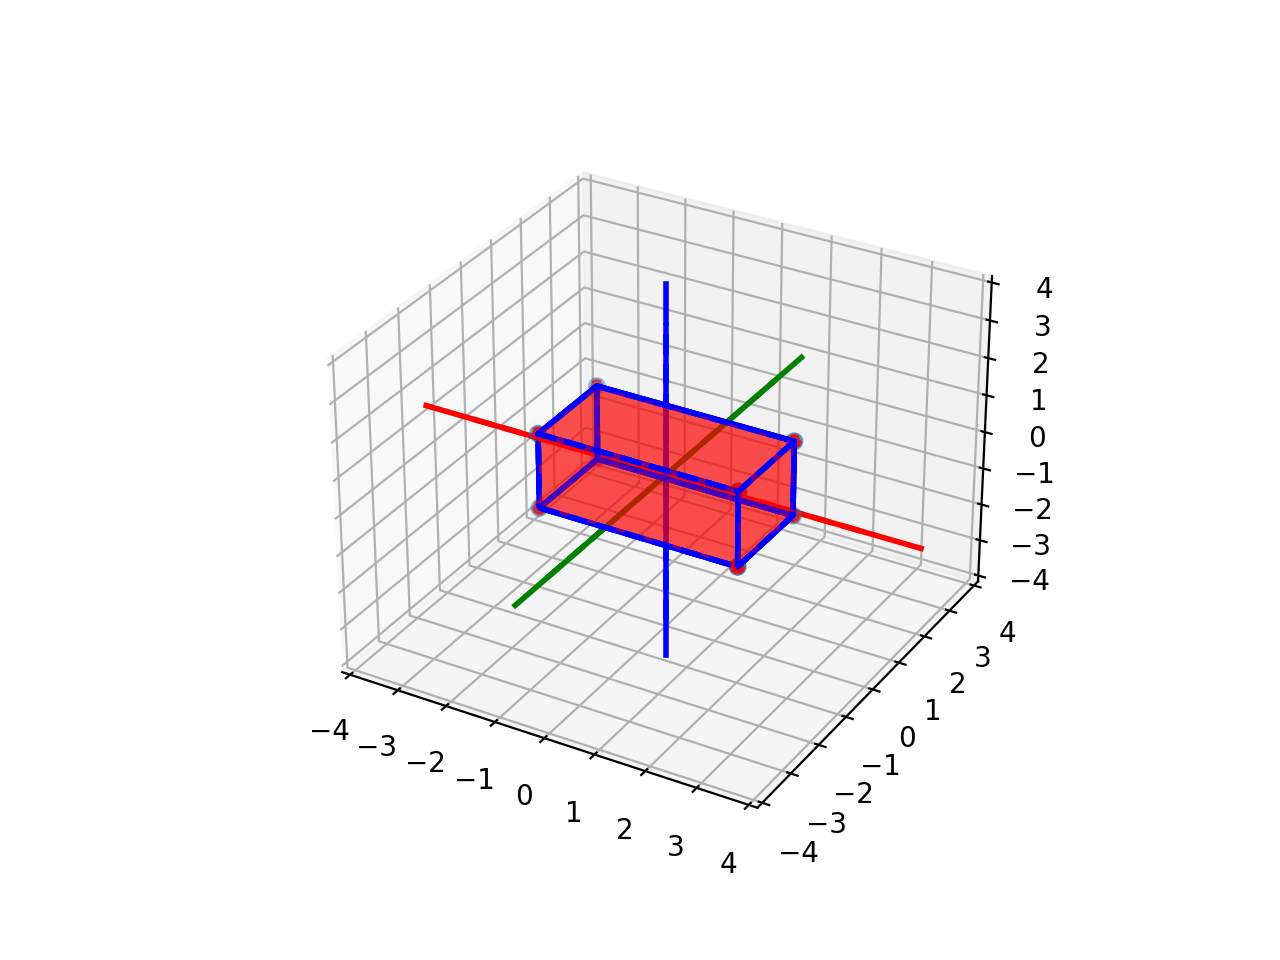

### Use the slider to change theta

interactive(children=(FloatSlider(value=0.0, description='theta', max=4.0, min=-4.0, step=0.04), Output()), _d…

<function __main__.<lambda>(theta)>

In [6]:
def display_cube(ax,v, w, theta):
    # vertices of a cube
    vertices = np.array([[-2., -1, -1], [2, -1, -1], [2, 1, -1],  [-2, 1, -1], 
                         [-2., -1, 1], [2, -1, 1], [2, 1, 1],  [-2, 1, 1]])

    T = transforms.T_exp(theta*v,theta*w)
    
    output = 'Norm of w = ' + str(np.sqrt(w.T.dot(w))) + '\n'
    display(Markdown(output))
    
    output = 'Screw axis S = ' + pmatrix(np.array([np.concatenate([w,v])]).T) + '\n'
    display(Markdown(output))
    
    output = 'Resulting twist $V = \\theta \cdot S$' + pmatrix(theta*np.array([np.concatenate([w,v])]).T) + '\n'
    display(Markdown(output))
    
    output = '$T = \mathrm{e}^{[\\theta \cdot S]}=' + bmatrix(T) + '$'
    display(Markdown(output))
    
    update_plot(ax, vertices, transform_cube(vertices,T), T, axis=w)
    

# display(Markdown('### Displays a pure translation along z'))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
v = np.array([0,0,1]) #pure translation along z of 4
w = np.array([0,0,0]) #no rotation
display(Markdown('### Use the slider to change theta'))
interact(lambda theta: display_cube(ax,v,w,theta), theta=(-4.0,4.0,0.04))

## A pure rotation about a point l about the z axis
We can write the pure rotation by $\theta$ about the point $l$ in exponential coordinates as $w = \begin{bmatrix} 0\\ 0 \\ \theta \end{bmatrix}$ and $v = -w \times l = - \begin{bmatrix} 0\\0\\\theta  \end{bmatrix} \times \begin{bmatrix} l_x\\l_y \\ l_z  \end{bmatrix} = \begin{bmatrix}-\theta l_y \\ \theta l_x \\ 0 \end{bmatrix}$ and the resulting transform will be $T = e^{\begin{bmatrix} \widehat{w} & v\\ 0 & 0\end{bmatrix}} = \begin{bmatrix} \cos \theta & -\sin \theta & 0 & l_x (1-\cos \theta) + l_y \sin \theta\\ \sin \theta & \cos \theta & 0 & - l_x \sin \theta + l_y (1-\cos \theta) \\ 0 & 0 & 1 & 0 \\ 0&0&0& 1 \end{bmatrix}$

<IPython.core.display.Javascript object>


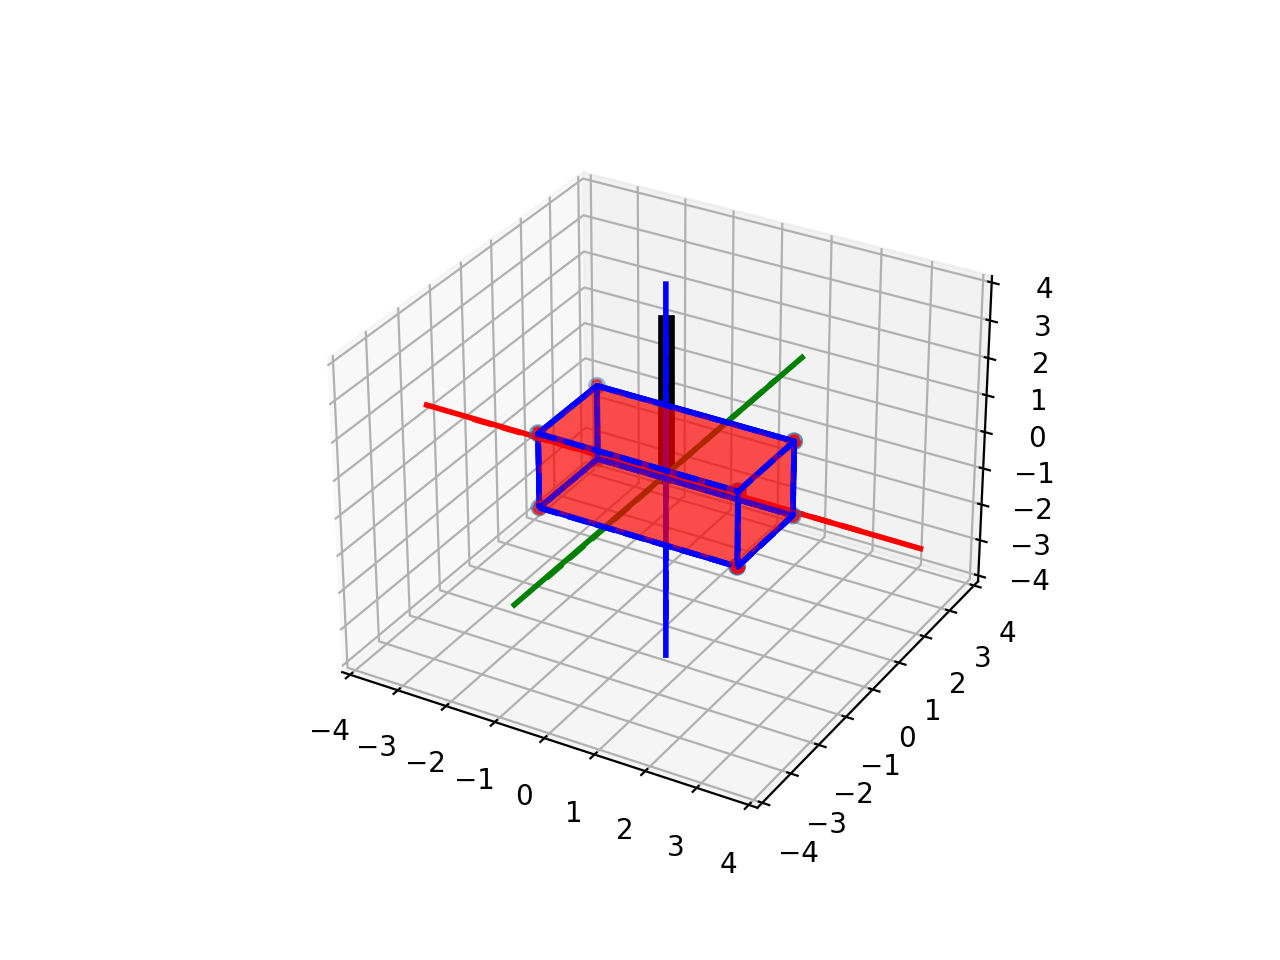

We choose to rotate about the point l=[2 2 0]

### Use the slider to change theta

interactive(children=(FloatSlider(value=-0.0031853071795859833, description='theta', max=6.283185307179586, mi…

<function __main__.<lambda>(theta)>

In [7]:
# display(Markdown('### Displays a rotation about a point l about the z axis'))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
w = np.array([0,0,1]) #rotation around z
l = np.array([2,2,0]) #arbitrary choice for l
display(Markdown(f'We choose to rotate about the point l={l}'))
display(Markdown('### Use the slider to change theta'))
interact(lambda theta: display_cube(ax,np.array([l[1],-l[0],0]),w,theta), theta=(-2*pi,2*pi,0.01))

## An arbitrary twist to represent a transformation
We can also use an arbitrary twist to represent a transformation and scale it with $\theta$ as the example below shows.

<IPython.core.display.Javascript object>


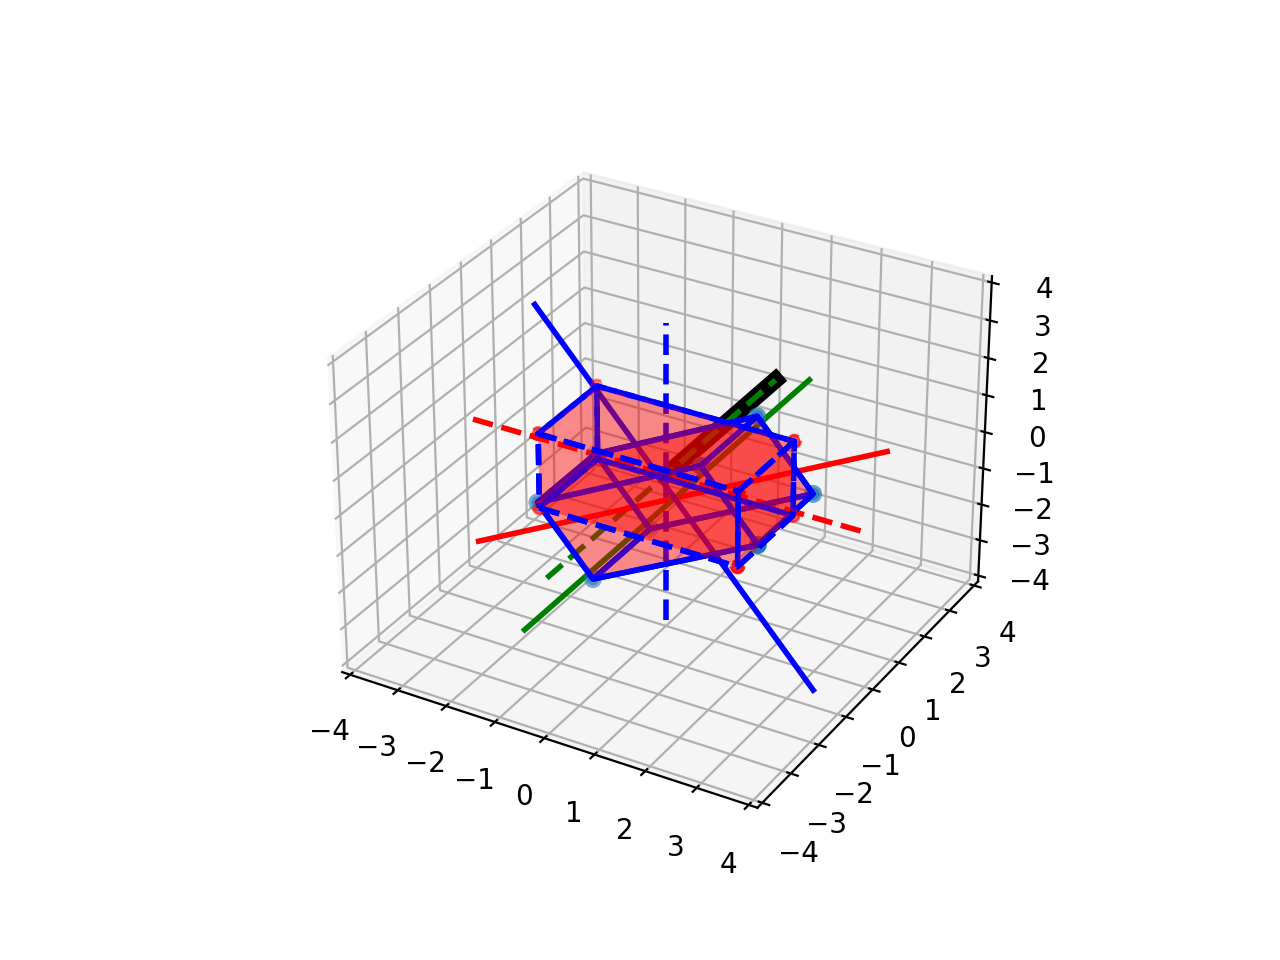

### Use the slider to change theta

interactive(children=(FloatSlider(value=0.0, description='theta', max=4.0, min=-4.0, step=0.04), Output()), _d…

<function __main__.<lambda>(theta)>

In [9]:
def display_cube(ax,v, w, theta):
    # vertices of a cube
    vertices = np.array([[-2., -1, -1], [2, -1, -1], [2, 1, -1],  [-2, 1, -1], 
                         [-2., -1, 1], [2, -1, 1], [2, 1, 1],  [-2, 1, 1]])
    
    T = transforms.T_exp(theta*v,theta*w)
    
    output = 'Norm of w = ' + str(np.sqrt(w.T.dot(w))) + '\n'
    display(Markdown(output))
    
    output = '(non unit) Screw axis S = ' + pmatrix(np.array([np.concatenate([w,v])]).T) + '\n'
    display(Markdown(output))
    
    output = 'Resulting twist $V = \\theta \cdot S$' + pmatrix(theta*np.array([np.concatenate([w,v])]).T) + '\n'
    display(Markdown(output))
    
    output = '$T = \mathrm{e}^{[\\theta \cdot S]}=' + bmatrix(T) + '$'
    display(Markdown(output))
    
    update_plot(ax, vertices, transform_cube(vertices,T), T, axis=w)
    

# display(Markdown('### Displays a pure translation along z'))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
v = np.array([0,0,1]) #pure translation along z of 4
w = np.array([0,1,0]) #no rotation
display(Markdown('### Use the slider to change theta'))
interact(lambda theta: display_cube(ax,v,w,theta), theta=(-4.0,4.0,0.04))